In [15]:
import numpy as np

probability_sets = [[1.0, 0], [0.9, 0.1], [0.8, 0.2], [0.7, 0.3], [0.6, 0.4], [0.5, 0.5]]

dict_of_mb_data = {'100_z': '', '90_z': '', '80_z': '', '70_z': '', '60_z': '', '50_z': ''}
list_of_keys = list(dict_of_mb_data.keys())


for i in range(0, len(probability_sets)):
    print(i)
    randomdata = np.random.choice([0, 1], size=838860800, replace=True, p=probability_sets[i])
    dict_of_mb_data[list_of_keys[i]] = randomdata
    this_data = np.packbits(randomdata)
    file_name = list_of_keys[i]
    file_name_fa = str(file_name) + '.fa'
    open(file_name_fa, 'wb').write(this_data)
    
print('done!')

0
1
2
3
4
5
done!


In [16]:
import numpy as np

base_pairs = ['A', 'T','C','G']
aa_list = ['D','T','S','E','P','G','A','C','V','M', 'I','L','Y','F','H','K','R','W','Q','N']
size_of_random_data = 100000000
num_aas = len(aa_list)
prob_aas = 1/len(aa_list)
bp_probs = [0.25,0.25,0.25,0.25]
aa_probs = prob_aas*(np.ones(num_aas))
print(aa_probs)

print('about to start generating data')
random_bp_data = np.random.choice(base_pairs,size = size_of_random_data, replace = True, p = bp_probs)
print('done generating random bp data')
packed_bp_data = random_bp_data
file_name = '100milbp2.fa'
print('writing file')
open(file_name, 'w').write(''.join(random_bp_data))
print('wrote bp file')
print('about to start generating data')
random_aa_data = np.random.choice(aa_list, size = size_of_random_data, replace = True, p = aa_probs)
print('done generating random aa data')
packed_aa_data = random_aa_data
file_name2 = '100milaa2.fa'
print('writing file')
open(file_name2, 'w').write(''.join(random_aa_data))
print('wrote aa file')

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
about to start generating data
done generating random bp data
writing file
wrote bp file
about to start generating data
done generating random aa data
writing file
wrote aa file


__Analysis__

The results of my analysis are summarized in the table below. The "time" columns are in units of seconds, while the file sizes are in units of kilobytes. 

_Which algorithm achieves the best level of compression?_

The algorithm that achieved the best level of compression was ArithmeticCompression (except for the random amino acid sequences, where pbzip2 and bzip2 had the best compression), which was also the slowest algorithm. 

_Which algorithm is the fastest?_

pbzip2 proved to be the fastest algorithm by at least roughly one order of magnitude on a given data sample. 

_What is the difference between bzip2 and pbzip2? Do you expect one to be faster and why?_

pbzip2 is a parallel implementation of bzip2 that uses all available CPU's and 100 MB RAM by default according to this source https://linuxconfig.org/how-to-perform-a-faster-data-compression-with-pbzip2, which leads me to expect pbzip2 to be much faster than bzip2, as the data suggests. 

_How does the level of compression change as the percentage of zeros increases? Why does this happen?_

As the number of zeros increases, the shannon entropy decreases, as the probability of getting anything other than a zero decreases. Thus, the 'surprise' factor of getting a zero, and thus the information content of the data on an intuitive level, decreases. Therefore, fewer bits are required to store the and we are able to compress it further than a series of numbers with more variation (e.g. data with a percentage of ones closer to 50%). 

_What is the minimum number of bits required to store a single DNA base?_

The minimum number of bits required to store a single base is 2 bits (log base 2 of 4 possible bases).

_What is the minimum number of bits required to store an amino acid letter?

The minimum number of bits required to store a single base is roughly 4.32 (log base 2 of 20 possible amino acids).

_In your tests, how many bits did gzip and bzip2 actually require to store your random DNA and protein sequences?_

Since one byte is equal to 8 bits, gzip required 230,000,000 and 480,000,000 bits (8 multiplied by 1000 multiplied by the number of kilobytes in the compressed file) to store the data in the random DNA and protein sequences, respectively. bzip2 required 218,000,000 and 442,400,000 bits to store the data in the random DNA and protein sequences, respectively.

_Are gzip and bzip2 performing well on DNA and proteins?_

gzip and bzip2 performed the best on the 100 million-bp-long sequence of base pairs. With the 100-million-amino-acid-long sequence of random amino acids, ArithmeticCompress performed the best, though only marginally. Thus, I would say that gzip and bzip2 performed relatively well compared to the other algorithms. This is particularly true of pbzip2, which was by far the fastest by 1-2 order of magnitude compared to the other algorithms. 







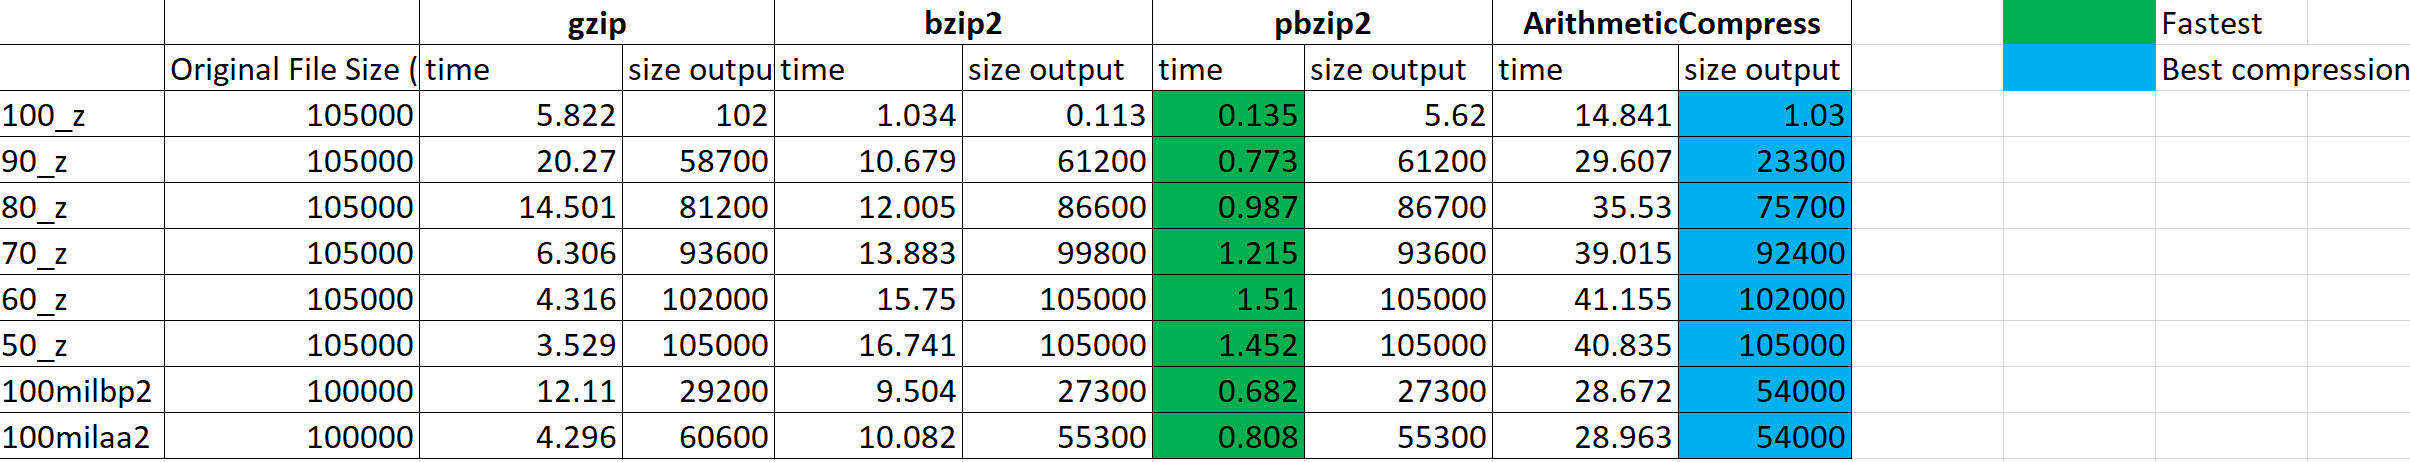

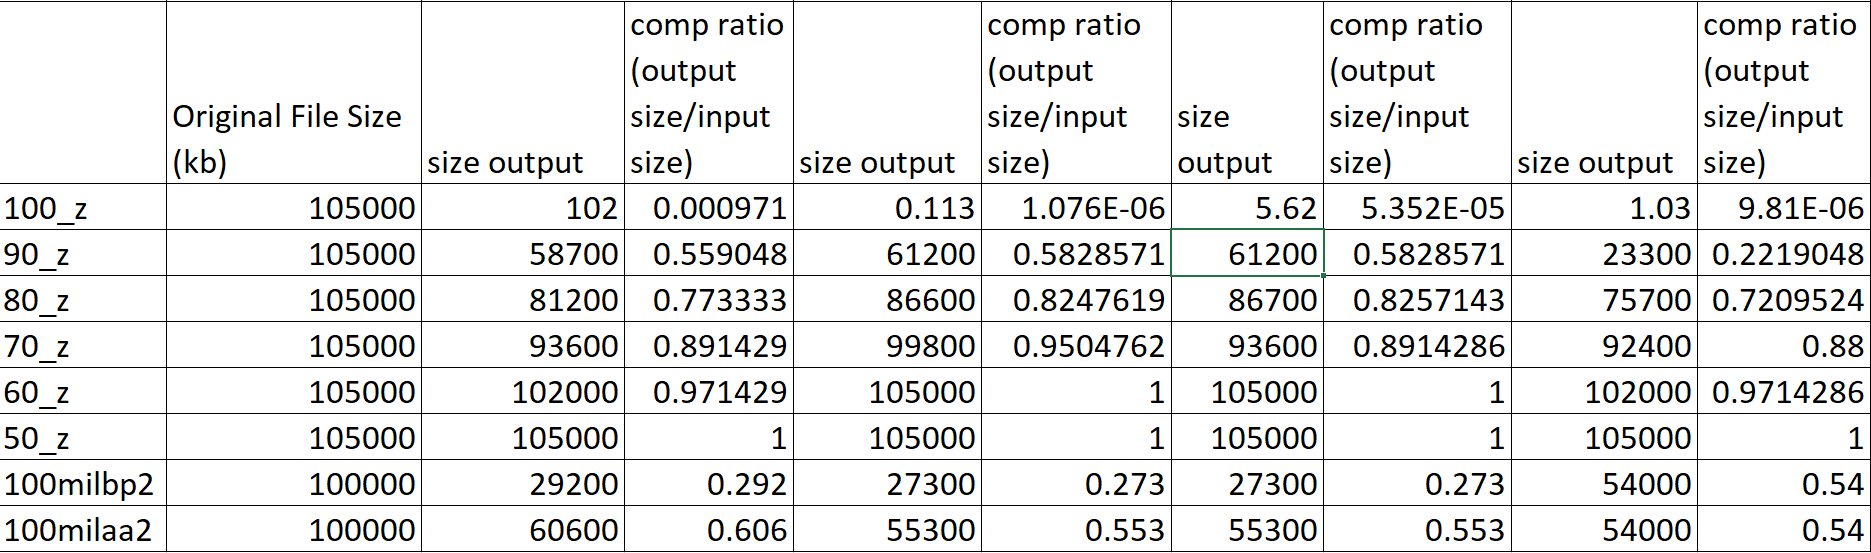

The following code uses Entrez to retrieve gp120 HIV genome sequences in order to test their compression with the algorithms previously used. 

In [26]:
from Bio import Entrez
from Bio import Entrez
open('fasta.fa','w')

Entrez.email='hurtadoj@berkeley.edu'
handle=Entrez.esearch(db='nucleotide',term='gp120 HIV',sort='relevance',idtype='acc')

x=0
for i in Entrez.read(handle)['IdList']:
    if x<11:
        handle=Entrez.efetch(db='nucleotide',id=i, rettype='fasta',retmode='text')
        open('gp120.fa','a+').write(handle.read())
        x=x+1

__Analysis with real data__

A priori, I expect to achieve better compression here than random data, as the Shannon entropy will be lower in data that is anything less than random, requiring fewer bits for storage. As expected, the compressoin ratio of this file (shown in the table below across different variables) is far better than that seen with random data (except in the case of a string containing 100% zeros, as we would expected given the much lower Shannon entropy of such a string). The size output is generally roughly three orders of magnitude smaller than the size of the input file, whereas with the random data we were seeing compression ratios of roughly 1/5 to close to 100% of the original file size (except for in the sample containing 100% zeros, in which the ratio of the output file size to that of the input file was roughly 10^-6 - 10^-5, as expected for such a low Shannon entropy sequence). Notably, the ArithmeticCompress algorithm performed far worse here than its competitors with an output file size of roughly 15% of the original file size. 


Given the benchmarking data I obtained in the lab, I would propose using an algorithm that is fast given the amount of data that we need to compress. Because we are looking at genomes and plasmids that are very similar to each other (that is, very far from being random sequences with high Shannon entropy), I would expect the compression ratio to be excellent with a fast compression algorithm. Thus, I would select pbzip2 for compressing DNA and protein sequences. For complete-random binary microscope images, I would suggest using ArithmeticCompress, where a huge benefit was seen over bzip2 in terms of compression ratio. 

I estimate I can reduce the data storage of 90% of our data by a factor of 1000 (99.9%), earning 500  dollars * 90 = 45000 dollars per day. 



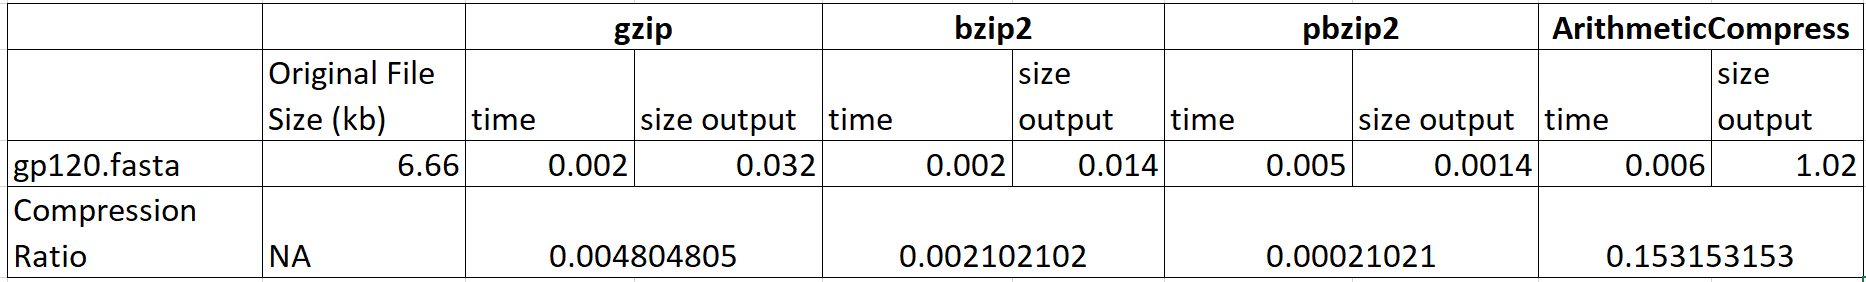